# Model Project 

We start by importing necessary packages:

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
from scipy import linalg
from scipy import optimize
import sympy as sm

# Solow model with climate change 

Consider the standard Solow-model with an indicator for climate change where:

$K_t$ is capital
    $L_t$ is labor (growing with a constant rate of $n$)
    $A_t$ is technology (growing with a constant rate of $g$)
    $D_t$ is the damage function (growing with a constant rate of $n$)
    $Y_t = F(K_t,A_t,L_t,D_t)$ is GDP

    
The Damage-function depends on temperature T

$$ D_t = 1-\frac{1}{1+\theta_1T_t^{\theta_2}} =< 1 $$

$T_t^{\theta_2}$ is the global mean temperature change at time t. $\theta_1$ is the damage parameter.
    
Cobb-Douglas production-function


$$ F(K_{t},A_{t}L_{t},D_{t})=  (1-D_{t})A_{t}K_{t}^{\alpha}L_{t}^{1-\alpha}$$

It is convenient to express all variables of interest in terms of per effective worker, as this can we used as a measure of welfare of sociely. We use small letters to denote per effective worker, so $y=Y/AL$ and $k=K/AL $, which gives: 

$$ f({k}_{t})=(1-D){k}_{t}^{\alpha} $$


Saving is a constant fraction of GDP

$$ S_t = sY_t,\,s\in(0,1) $$


 **Capital accumulates** according to

\\[ K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1) \\]

The economy is growing over time (due to exogenous technological progress and population growth), which makes it useful to focus on the behavior of capital stock per unit of effective labor. The transition in the model can be decribed by


\\[ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}] \\]




# Behavior of capital stock per unit of effective labor over time

## Model including climate change 

In [7]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
A = sm.symbols('A')
D = sm.symbols('D')
n = sm.symbols('n')
g = sm.symbols('g')

sm.init_printing(use_unicode=True)

Equation of capital stock per unit of effective labour

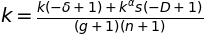

In [26]:
ss1 = sm.Eq(k,(s*((1-D)*((k)**alpha))+(1-delta)*k)/((1+n)*(1+g)))
ss1

Create a vector for time, t 

In [27]:
x_vec = np.zeros((100,1))

In [28]:
x_vec[0] = 1

Then we select some parameter values, Let
$$s=0.2 $$
$$ g=0.02 $$ 
$$ n=0.01 $$
$$ delta=0.1$$
$$ alpha=1/3 $$
$$ D=0,1 $$

In [12]:
s = 0.2
g = 0.02
n = 0.01
delta = 0.1
alpha = (1/3)
D = 0.1

Now, plug vector x_vec into the capital transition equation: 

In [13]:
for i in range(1, 100):
    x_vec[i] = (s*(1-D)*x_vec[i-1]**alpha+(1-delta)*x_vec[i-1])/((1+g)*(1+n))

Now we can check whether the x_vec [steady state capital] converges to a steady state.

In [14]:
x_vec

array([[1.        ],
       [1.04834013],
       [1.09334207],
       [1.13516079],
       [1.17396056],
       [1.20991008],
       [1.24317873],
       [1.27393383],
       [1.30233866],
       [1.328551  ],
       [1.35272218],
       [1.3749964 ],
       [1.39551038],
       [1.4143932 ],
       [1.43176626],
       [1.44774341],
       [1.46243112],
       [1.47592874],
       [1.48832876],
       [1.49971719],
       [1.51017383],
       [1.51977267],
       [1.5285822 ],
       [1.53666575],
       [1.54408184],
       [1.5508845 ],
       [1.55712355],
       [1.56284493],
       [1.56809096],
       [1.57290059],
       [1.5773097 ],
       [1.58135125],
       [1.58505559],
       [1.58845058],
       [1.59156185],
       [1.59441292],
       [1.5970254 ],
       [1.59941913],
       [1.60161232],
       [1.60362169],
       [1.60546255],
       [1.60714899],
       [1.60869391],
       [1.61010912],
       [1.6114055 ],
       [1.61259299],
       [1.6136807 ],
       [1.614

## Model ignoring climate change

In [15]:
ss2 = sm.Eq(k,(s*(((k)**alpha))+(1-delta)*k)/((1+n)*(1+g)))
ss2

Create a vector to plug in for time, t

In [16]:
y_vec = np.zeros((100,1))

In [17]:
y_vec[0] = 1

plug vector y_vec in the equation for behavior of capital stock per unit of effective labour.

In [18]:
for i in range(1, 100):
    y_vec[i] = (s*y_vec[i-1]**alpha+(1-delta)*y_vec[i-1])/((1+g)*(1+n))

### Plot both functions in the same graph

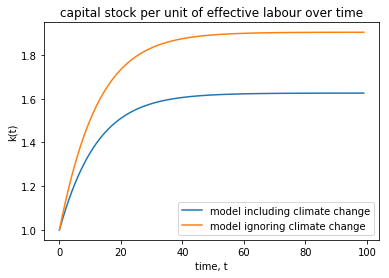

In [19]:
fid, ax = plt.subplots()
ax.plot(x_vec, label="model including climate change")
ax.plot(y_vec, label="model ignoring climate change")
ax.set(xlabel = 'time, t', ylabel ='k(t)')
plt.title('capital stock per unit of effective labour over time')
plt.legend()
plt.show()

Both equations converge to a steady state over time. The model including climate change has a lower steady state because it implements climate change as a external cost.

# Steady state calculations 

We now want to find an **analytic an analytical** expression for the steady state, that is: where $ k_{t+1} = k_{t} =k_{ss}$

In [20]:

k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
A = sm.symbols('A')
D = sm.symbols('D')
n = sm.symbols('n')
g = sm.symbols('g')

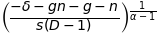

In [21]:
sm.init_printing(use_unicode=True)

f = (1-D)*((k)**alpha)
ss = sm.Eq(k,(s*f+(1-delta)*k)/((1+n)*(1+g)))
kss = sm.solve(ss,k)[0]
kss


In the standard Solow model, **without the damage-function**, the steady state capital is given by: 

In [22]:
f1= (k)**alpha
ss1 = sm.Eq(k,(s*f1+(1-delta)*k)/((1+n)*(1+g)))
kss1 = sm.solve(ss1,k)[0]
kss1

From these equations it becomes clear that, with D≤1, the steady state capital growth is reduced by including the damage-function, compared to the the model without

We can also find the **specific numerical value** for steady state capital. Usning the same parameter values as before, we have 

$$s=0.2 $$
$$ g=0.02 $$ 
$$ n=0.01 $$
$$ delta=0.1$$
$$ alpha=1/3 $$
$$ D=0,1 $$

In [30]:
ss_func = sm.lambdify((s,g,n,delta,alpha,D),kss)

Steady state capital, including the damage function, is then given by:

In [31]:
ss_func(0.2,0.02,0.01,0.1,1/3, 0.1)

By comparison, excluding the damage function, the steady state is given by:

In [32]:
ss_func(0.2,0.02,0.01,0.1,1/3, 0)

Notice how these values corresponds to steady state levels the figure. 

It becomes clear that the steady state capital excluding the damage function (representing climate change) is higher than the steady state capital in case of climate damage. Climate change is a negative externality for the society. For example, increased temperature causes sea level to rise and drought periods. This again, can increase human conflicts. Today's generation benefits from the use of fossil fuels, which releases greenhouse gases into the atmosphere and in turn causes climate change. But the benefit from using fossil fuels, does not internalize these external costs of climate change. 

# Impact of damage on steady state capital 

In order to visualize the impact of damage due to climate change (ceteris paribus), we plot the steady state as a dependent variable of D.

First, create a list that contains all values we want D to take

In [33]:
Ds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Define the function that returns the steady state only dependent on D.


In [34]:
def calc_ss(D):
    return ss_func(0.2,0.02,0.01,0.1,1/3, D)


Create a while loop so that a new list (nDs)is generated that contains all steady states for the respective D.


In [35]:
index = 0
while index <= len(Ds)-1:
    Ds[index] = calc_ss(Ds[index])
    index = index +1

print(Ds)

[1.903831539231319, 1.6255198652134988, 1.3622709566173723, 1.1150018222907796, 0.8848209414512797, 0.6731060958136442, 0.4816355156188146, 0.31283144391803264, 0.17028386957717148, 0.06020443945235181]


In [36]:
Damage = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

## Plot: 

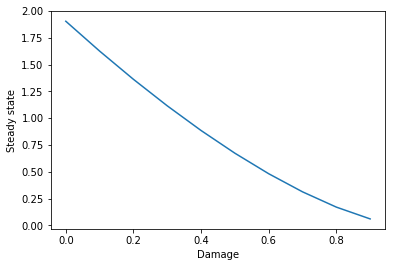

In [37]:
fid, ax = plt.subplots()
ax.plot(Damage, Ds)
ax.set(xlabel = 'Damage', ylabel ='Steady state')
plt.show()

From the plot we can see that as damage increases, the steady state capital decreases. This could be due to higher expenses in order to compensate for i.e. agricultural damage.